## Variables suport i lectura de dades

In [1]:
import networkx as nx
import copy
import matplotlib.pyplot as plt

In [2]:
# Dataset (a la pràctica s'haurà de llegir d'un csv o algo així)
caps = {
    'Alice': {'branques': ['CiLL', 'LLiD', 'RiNG', 'PiC'], 'not_with': ['Bob', 'Charlie']},
    'Bob': {'branques': ['LLiD', 'CiLL', 'PiC', 'RiNG'], 'not_with': ['Alice']},
    'Charlie': {'branques': ['RiNG', 'PiC', 'CiLL', 'LLiD'], 'not_with': ['David']},
    'David': {'branques': ['PiC', 'RiNG', 'LLiD', 'CiLL'], 'not_with': ['Bob']},
    'Emma': {'branques': ['RiNG', 'PiC', 'CiLL', 'LLiD'], 'not_with': []},
    'Frank': {'branques': ['CiLL', 'RiNG', 'PiC', 'LLiD'], 'not_with': []},
    'Grace': {'branques': ['PiC', 'RiNG', 'CiLL', 'LLiD'], 'not_with': []},
    'Harry': {'branques': ['LLiD', 'CiLL', 'RiNG', 'PiC'], 'not_with': []},
}

# Variables auxiliars
num_equips = 2
caps_per_equip = 4

# Diccionari per repartir els equips
nom_unitats = {
    'CiLL': ["ChurunMeru", "Wami"],
    'LLiD': ["Seonee", "Wahya"],
    'RiNG': ["Encantats", "Besiberris"],
    'PiC':  ["Maracaibo", "Tanganyica"]
}


# Variable on guardar els equips (dues llistes buides a cada branca)
equips_de_branques = {
    'CiLL': [[], []],
    'LLiD': [[], []],
    'RiNG': [[], []],
    'PiC':  [[], []]
}
# Ordena per preferència de branca
caps_ordenat = sorted(caps.items(), key=lambda x: x[1]['branques'])


## Visualització com a graf

In [3]:
def createGraph():
    G = nx.DiGraph()
    for cap in caps:
        for incompatible in caps[cap]['not_with']:
            G.add_edge(cap, incompatible)
        if caps[cap]['not_with']==[]:
            G.add_node(cap)
    nx.draw_networkx(G, with_labels=True, node_color=createColorMap(G))
    
def createColorMap(graph):
    colors = []
    for c in graph.nodes():
        if caps[c]['branques'][0]=='CiLL':
            colors.append("#fcce83")
        elif caps[c]['branques'][0]=='LLiD':
            colors.append("#fcf69a")
        elif caps[c]['branques'][0]=='RiNG':
            colors.append("#a5cefa")
        elif caps[c]['branques'][0]=='PiC':
            colors.append("#fca09d")
    return colors

# @param: si la restricció de compatibilitat és forta o dèbil
def complement(strong=False):
    G_compl = nx.DiGraph()
    for cap in caps:
        G_compl.add_node(cap)
    for cap in caps:
        for cap2 in caps:
            if cap != cap2:
                G_compl.add_edge(cap, cap2)
    for cap in caps:
        for incompatible in caps[cap]['not_with']:
            if (cap,incompatible) in G_compl.edges():
                G_compl.remove_edge(cap, incompatible)
                if strong:
                    G_compl.remove_edge(incompatible, cap)
    nx.draw_networkx(G_compl, with_labels=True, node_color=createColorMap(G_compl))


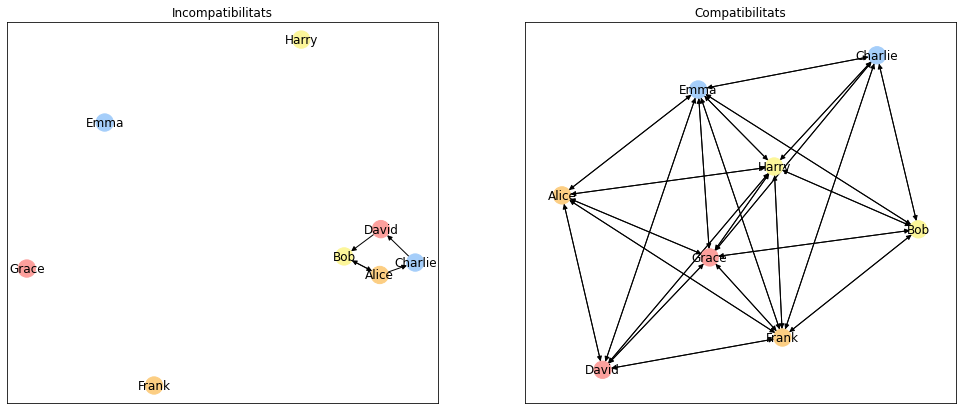

In [4]:
plt.figure(figsize=(17,7))

plt.subplot(1, 2, 1)
plt.title("Incompatibilitats")
createGraph()

plt.subplot(1, 2, 2)
plt.title("Compatibilitats")
complement(True)

## Definició de funcions

In [5]:
def reset():
    equips_de_branques = {
    'CiLL': [[], []],
    'LLiD': [[], []],
    'RiNG': [[], []],
    'PiC':  [[], []]
    }
    caps_ordenat = sorted(caps.items(), key=lambda x: x[1]['branques'])

# Intenta assignar per preferència
def assign():
    for person, preferences in caps_ordenat:
        assigned = False
        for branca in preferences['branques']:
            for unitat in range(num_equips):
                if person not in preferences['not_with'] and len(equips_de_branques[branca][unitat]) < caps_per_equip:
                    equips_de_branques[branca][unitat].append(person)
                    assigned = True
                    break
            if assigned:
                break

# Mira les incompatibilitats i corregeix
def check():
    for branca in equips_de_branques:
        for unitat in range(num_equips):
            for person in equips_de_branques[branca][unitat]:
                for not_with in caps[person]['not_with']:
                    if not_with in equips_de_branques[branca][unitat]:
                        # Intenta corregir afegint una persona que vulgui estar a la branca i sigui compatible
                        for new_person, new_preferences in caps_ordenat:
                            if new_person not in equips_de_branques[branca][unitat] and not_with not in new_preferences['not_with']:
                                equips_de_branques[branca][unitat].remove(person)
                                equips_de_branques[branca][unitat].append(new_person)
                                break

# Imprimeix els equips
def result():
    for branca, unitats in equips_de_branques.items():
        print(f'{branca}:')
        for i in range(num_equips):
            print(f'{nom_unitats[branca][i]}: {", ".join(unitats[i])}')
        print()
        
def PropostaEquips():
    reset()
    assign()
    check()
    result()

# Resultat

In [6]:
# Falta testejar si amb dades reals i més complexes s'atura
# o dona un resultat poc satisfactori
PropostaEquips()

CiLL:
ChurunMeru: Alice, Frank
Wami: 

LLiD:
Seonee: Bob, Harry
Wahya: 

RiNG:
Encantats: Charlie, Emma
Besiberris: 

PiC:
Maracaibo: Grace, David
Tanganyica: 

